# ASSIGNMENT 6, QUESTION 1
### FACIAL RECOGNITION USING PRINCIPAL COMPONENT ANALYSIS 
In this assignment, we use the data collected from us and 9 of our friends in order to evaluate the accuracy of the PCA approach for detecting faces. This has a number of security and authentication applications. 

In [61]:
import PIL 
import imageio as im
import numpy as np 
import pandas as pd 
import os, sys, glob
import matplotlib.pyplot as plt
path = '/Users/bhanubhandari/Downloads/Faces/'

## PREPROCESSING THE DATA 
The data size in this case is 4000x3000, obtained from a mobile phone camera in RGB. To make it reasonably quick, we reduce the quality of the image to around 128x128 pixels in grayscale. This is done in order to increase the chances of small facial features helping in the recognition process of the faces. We then display a few images in order to see the effects of processing on the raw images. 

In [62]:
# size = 128, 128
# from PIL import Image
# for infile in glob.glob("*.jpg"):
#    file, ext = os.path.splitext(infile)
#    im1 = Image.open(infile)
#    im1.thumbnail(size)
#    im1.save(file + "_proc.jpg", "JPEG")

face_data = []
face_data_raw = []
for i in range (1,10):
    for j in range (1,5):
        filename = str(path + str(i) +'_' + str(j) + '_proc' + '.jpg')
        temp = im.imread(filename)
        temp[:] = np.max(temp,axis=-1,keepdims=1)/2+np.min(temp,axis=-1,keepdims=1)/2
        face_data_raw.append(temp)
        f = temp.flatten()
        face_data.append(f)
        
train_faces = np.asarray(face_data)

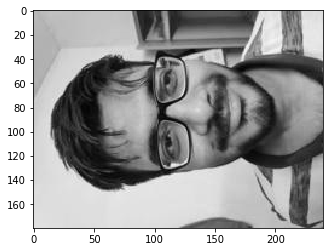

In [63]:
plt.imshow(face_data_raw[1])

(180, 240, 3)


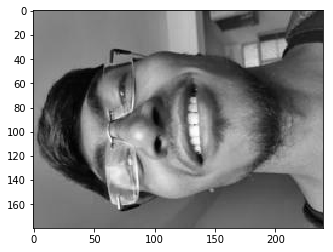

In [64]:
plt.imshow(face_data_raw[25])
print(face_data_raw[0].shape)

### Calculating the mean for further subtracting
This mean is used to convert the distribution into one which has a mean of zero. 

In [65]:
mean = np.mean(train_faces,axis=0)
mean

array([167.38888889, 167.38888889, 167.38888889, ..., 112.69444444,
       112.69444444, 112.69444444])

We now subtract the means from all the images. 

In [66]:
for i in range (train_faces.shape[1]):
        for j in range(train_faces.shape[0]):
            train_faces[j][i] = train_faces[j][i] - mean[i]

### Calculating the eigenfaces and weights
This step is the next step in finding out the most important $k$ parts of the image. We use numpy to obtain the eigenvalues and eigenvectors in order to perform the following Principal Component Analysis.

Once we have obtained those informations, we proceed towards calculating the most important vectors and multiplying them with the weights in order to obtain the eigenfaces. We display the eigenfaces for two different cases: 
$k=1$ and $k=5$, where $k$ is the number of important eigenvalues we are choosing. 

### $k$=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4581.72430813  842.97767778 -884.95181716  703.98798634  646.75650034
 -739.26569615  574.94700202  519.87502153 -633.99277629  472.11815644
  428.87331448  416.77927734 -577.00827289 -547.77522433 -507.93492282
 -498.85043572  342.76909947  303.30144473  282.29436687  228.25544284
  221.29957165  161.1232353   133.15379708 -388.80200017 -374.55367148
 -325.78143261   27.20803341  -10.83473547 -249.48718397 -228.01460563
 -206.25748846  -50.12223846  -73.53118451 -127.05422773 -140.79377529
 -168.4325466 ] [[-0.14532988 -0.03661184 -0.0353272  ...  0.32754797  0.12974572
   0.00442858]
 [-0.18657521  0.13923046  0.13444107 ... -0.06776258 -0.12031012
  -0.1728768 ]
 [-0.15090733  0.00983181 -0.10149802 ...  0.09330141 -0.13742142
  -0.06043404]
 ...
 [-0.17718347  0.0771461   0.19334746 ... -0.13789551  0.51995583
   0.14741659]
 [-0.18960572  0.05927119  0.06396336 ... -0.01822767 -0.19159631
   0.04534355]
 [-0.17029258  0.13141343  0.10681707 ...  0.15074219  0.27256882
  -0.156048

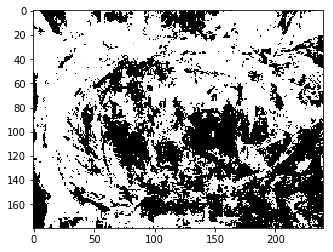

In [68]:
cov_mat = np.matmul(train_faces,np.transpose(train_faces))
eigval, eigvec = np.linalg.eig(cov_mat)
print(eigval,eigvec)
imp_eig_vec = eigvec[::,0:2]
eig_faces = np.matmul(np.transpose(imp_eig_vec),train_faces)
weights = np.matmul(eig_faces,np.transpose(train_faces))
print(weights)
print(eig_faces.shape, weights.shape)
eigen_face = eig_faces[1].reshape(180,240,3)
plt.imshow(eigen_face)

#### $k$=5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-9.98973392e+09 -1.15206293e+10 -1.46283311e+10 -1.21908659e+10
  -1.22763651e+10 -1.31004424e+10 -1.41690841e+10 -1.60621582e+10
  -1.18884944e+10 -1.26987249e+10 -1.47882783e+10 -1.26041362e+10
  -1.12323694e+10 -1.14971520e+10 -1.14530296e+10 -1.07320642e+10
  -1.07528118e+10 -1.08232472e+10 -1.38732870e+10 -1.35584716e+10
  -1.01026759e+10 -1.38168646e+10 -1.02003509e+10 -1.49297324e+10
  -1.41637940e+10 -1.42693700e+10 -1.10349340e+10 -1.50947401e+10
  -1.49402410e+10 -1.04790485e+10 -1.44781769e+10 -1.14797908e+10
  -1.40118496e+10 -1.43178188e+10 -1.42229103e+10 -1.72021676e+10]
 [ 2.26232920e+08  3.98143242e+08  4.03729848e+08  2.07736229e+08
  -6.39595735e+07  1.47660424e+08  1.04500929e+08  3.70638618e+08
   1.01262135e+08  5.37753479e+08  7.22528357e+08  1.46557480e+08
   1.91733411e+08  2.91372214e+08  4.38542955e+08  3.24009396e+08
   3.68244129e+08  3.02164974e+08  6.55305424e+08  4.58257539e+08
   3.95525570e+08  3.03289217e+08  5.05710737e+08  1.67830852e+08
   4.7806

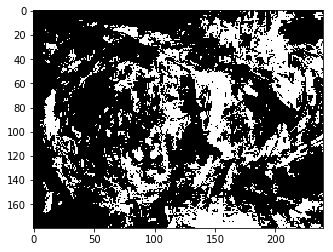

In [88]:
imp_eig_vec_1 = eigvec[::,0:10]
eig_faces_1 = np.matmul(np.transpose(imp_eig_vec_1),train_faces)
weights_1 = np.matmul(eig_faces_1,np.transpose(train_faces))
print(weights_1)
print(eig_faces_1.shape, weights_1.shape)
eigen_face_1 = eig_faces_1[3].reshape(180,240,3)
plt.imshow(eigen_face_1)

# PRINCIPAL COMPONENT ANALYSIS
Now, since we had picked up only 80% data for training purposes, we now use testing data from the left over 20%. We have already converted the raw images into smaller images, but they have not been mean-subtracted yet. Once that is done, we determine the distance between each of the different images from other images available to us, and obtain which class each image is the closest to. This gives us the information about the predicted class, which we compare with the actual class and obtain an accuracy figure. 
This is a 10 class division, so the results are not too great - there is definitely some scope for improvement, but given the data quality, the results are satisfactory. 

$$ k = 2 $$

In [86]:
labels = [1,2,3,4,5,6,7,8,9]
total_images = 9
correct = 0
min_dist = (10)**21
for k in range (1,10):
    filename = str(path + str(k) +'_5_proc' + '.jpg')
    temp = im.imread(filename)
    f = temp.flatten()
    test_obj = np.reshape(f,[129600,1])

    for i in range (36864):
        test_obj[i][0] = test_obj[i][0] - mean[i]

    test_face = np.matmul(eig_faces,test_obj)
    test_face = test_face[0][0]

    for i in range (weights.shape[1]):
        dist = abs(weights[0][i] - test_face)            
        if (dist < min_dist):
            min_dist = dist
            min_i = i
        if(min_i//9 == 0):
            pred = 9 
        else: 
            pred = (min_i//9)
    if (labels[k-1] == pred):
        correct = correct + 1
    print ("Actual class : " , labels[k-1], " Predicted class : ", pred)
print (correct, " correct predictions out of 9 images")
print ("Accuracy = ", (correct/total_images)*100, "%")

Actual class :  1  Predicted class :  2
Actual class :  2  Predicted class :  2
Actual class :  3  Predicted class :  2
Actual class :  4  Predicted class :  2
Actual class :  5  Predicted class :  9
Actual class :  6  Predicted class :  9
Actual class :  7  Predicted class :  9
Actual class :  8  Predicted class :  9
Actual class :  9  Predicted class :  9
2  correct predictions out of 9 images
Accuracy =  22.22222222222222 %


$$ k = 5 $$

In [90]:
labels = [1,2,3,4,5,6,7,8,9]
total_images = 9
correct = 0
min_dist = (10)**21
for k in range (1,10):
    filename = str(path + str(k) +'_5_proc' + '.jpg')
    temp = im.imread(filename)
    f = temp.flatten()
    test_obj = np.reshape(f,[129600,1])

    for i in range (36864):
        test_obj[i][0] = test_obj[i][0] - mean[i]

    test_face = np.matmul(eig_faces_1,test_obj)
    test_face = test_face[0][0]

    for i in range (weights.shape[1]):
        dist = abs(weights[0][i] - test_face)            
        if (dist < min_dist):
            min_dist = dist
            min_i = i
        if(min_i//9 == 0):
            pred = 9 
        else: 
            pred = (min_i//9)
    if (labels[k-1] == pred):
        correct = correct + 1
    print ("Actual class : " , labels[k-1], " Predicted class : ", pred)
print (correct, " correct predictions out of 9 images")
print ("Accuracy = ", (correct/total_images)*100, "%")

Actual class :  1  Predicted class :  2
Actual class :  2  Predicted class :  2
Actual class :  3  Predicted class :  2
Actual class :  4  Predicted class :  2
Actual class :  5  Predicted class :  9
Actual class :  6  Predicted class :  9
Actual class :  7  Predicted class :  9
Actual class :  8  Predicted class :  9
Actual class :  9  Predicted class :  9
2  correct predictions out of 9 images
Accuracy =  22.22222222222222 %


### SUMMARY 
In this assignment, we have explored the usage of a particular dimensionality reduction method in order to achieve the same results which would require a lot of processing time otherwise. We have constructed our own dataset in order to achieve facial recognition, which due to the lack of a studio setting while taking those pictures is causing a lack of accuracy. If we use a better dataset, we can definitely achieve a higher accuracy. 